## Gradient Boosting
Gradient boosting is one of machine learning ensemble technique used for both regression, and classification problems. Just like other ensemble learning technique gradient boosting produces a strong ml model by combining multiple weak models. Generally these weak models are decision tree. Unlike Random forest It builds each weak learners(decision tree) one at a time where each weak learners are dependent on its previouly formed weak learner. Each new weak learner tries to boost the effort of its previous weak learner by trying to reduce the error made by that.

### How gradient boosting (Regression) works
To understand the working of gradient boosting, let's see it step by step, also to understand it better we will do our dummy operation on this tiny dataset:
> 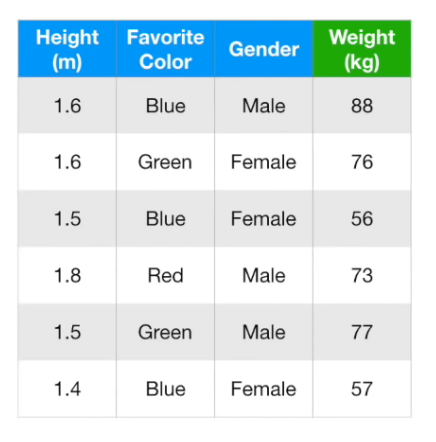

* **`Step 1:`** It start with a leaf(a decision tree without any node, just a leaf) which represents an initial prediction for every individual. Whose output value is the average value of the target column aka dependent variable as the prediction for every records. For eg in this step if we feed any records (set of features) to the model it will return the average value of the target column as the prediction.
> In our example dataset, it would look like this <br>
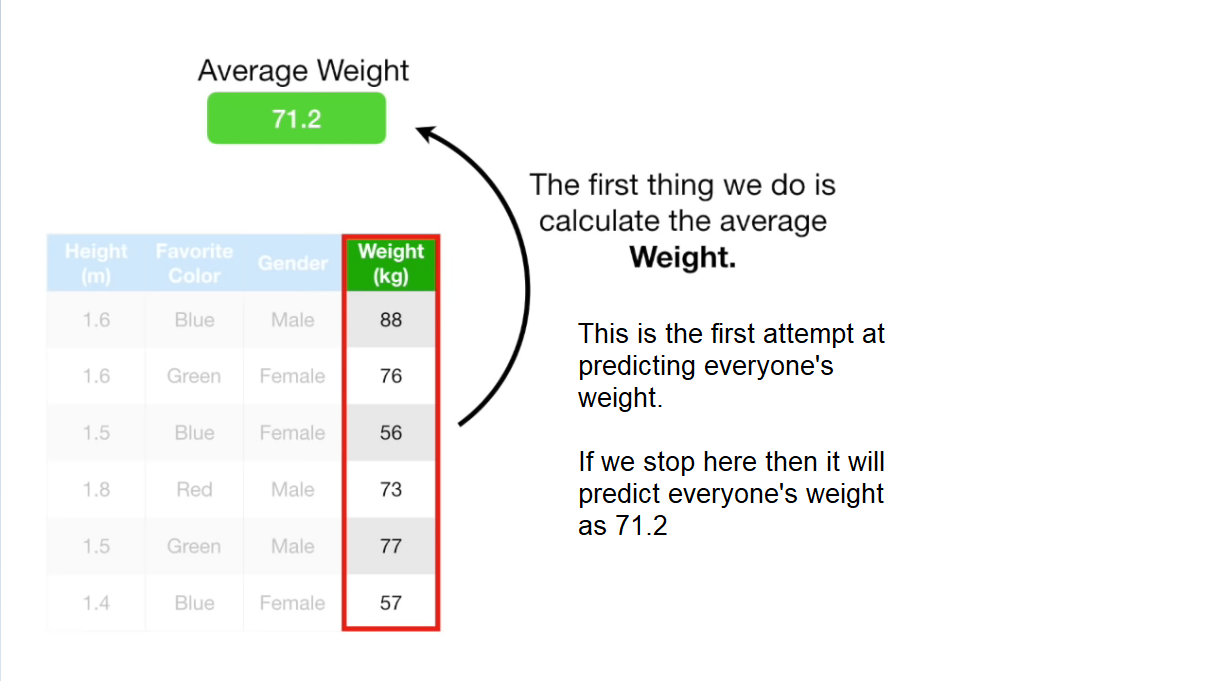

* **`Step 2:`** Next we calculate the error made by our first model(leaf). Which is calculated by substracting the predicted weight from the actual weight, this error value is known as `Pseudo residuals`. 
> 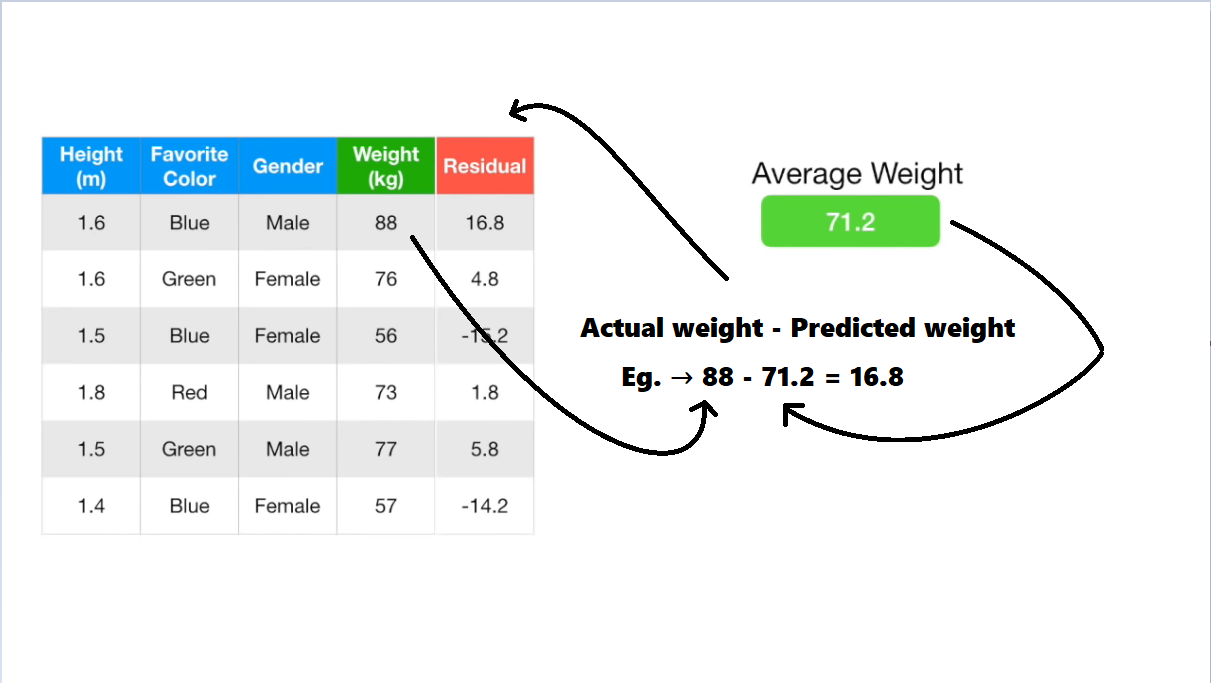

* **`Step 3:`** The next thing we do is build a decision tree based on the error we get from the first model (leaf). To make the decision tree we use all features of our dataset and use Pseudo residuals(we just calculated) as the target column innstead of actual target columns(yeah it is quite weird but this is the step). In other words we tries to predict the pseudo residual from our available features. Trees built in gradient boosting are larger than the stumps(tree with just root node and two leaf) but are not fully grown (then we should call it plant instead of tree haha, XD). These tree usually have in total 8-32 leaf nodes depending on size of the dataset, in our case we just have 4 leafs because of very small dataset.
> 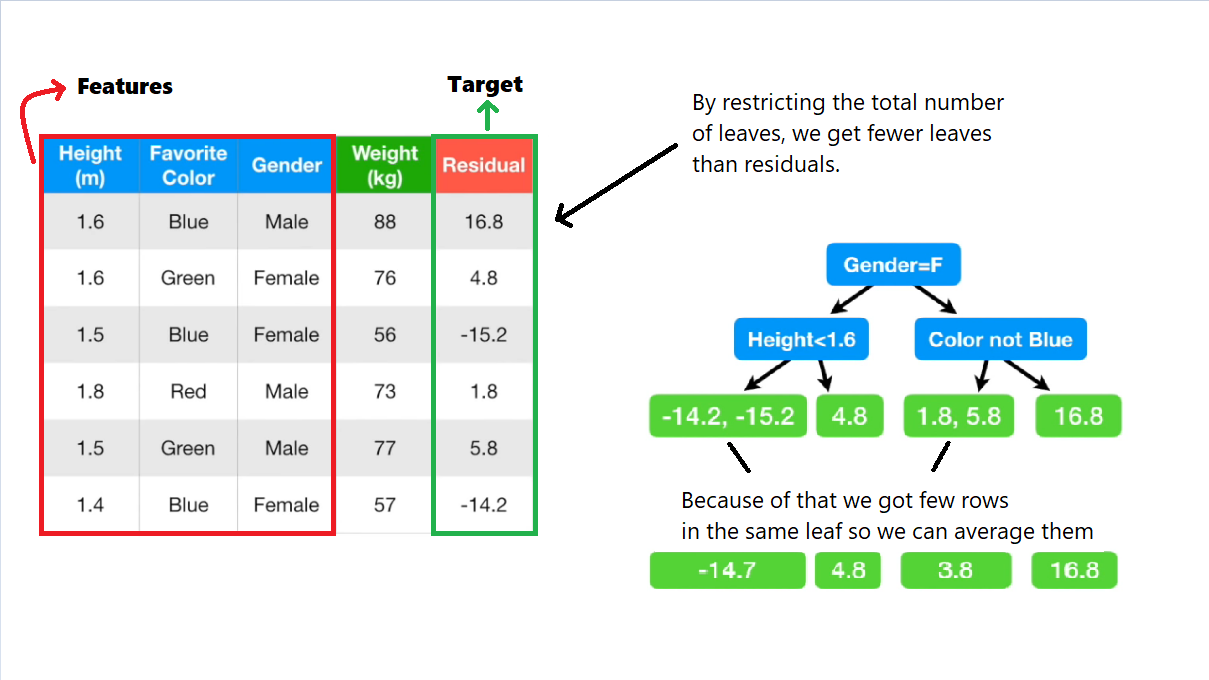

* **`Step 4:`** Next we combine the first leaf with this model and make prediction of all records of our training data. The combination of these models gives us very good accuracy, which means the model has low bias which could also means the model has high variance. 
> 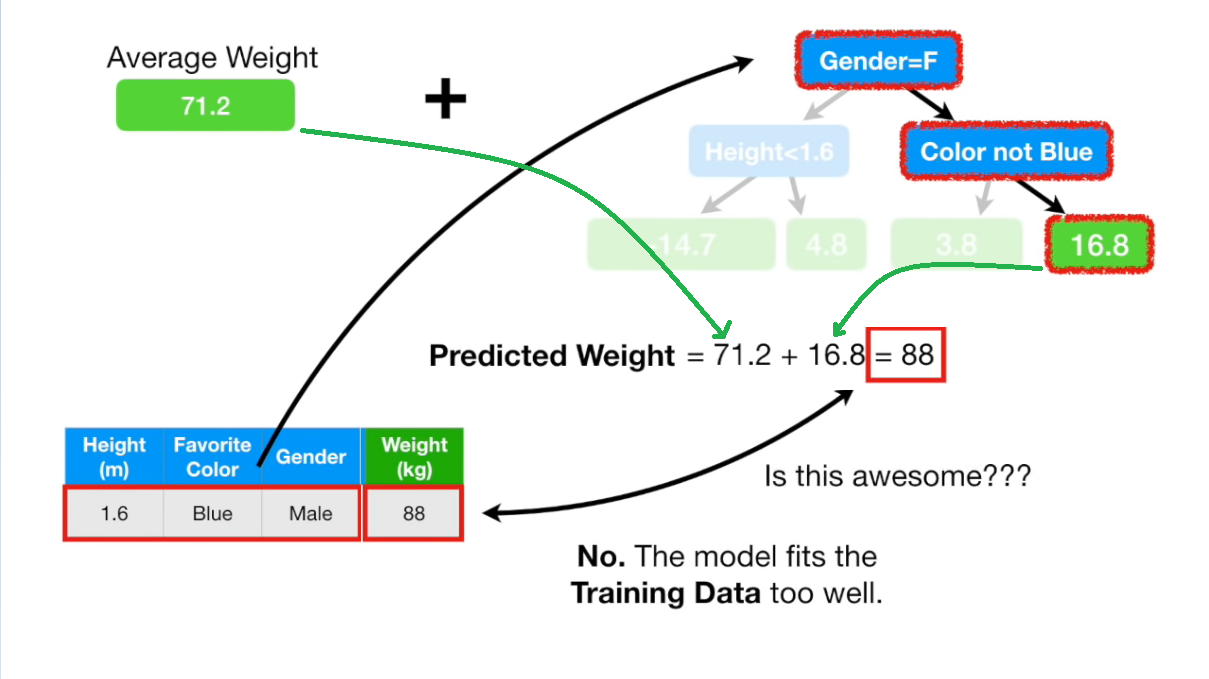<br>
So in order to reduce the variance of the model we scale the model by increasing the bias of the model (aka Bias variance trade-off) by adding a new parameter to the new tree called `learning rate`. The learning rate's value ranges from 0 to 1, higher values means introducing higher bias to the model.
> 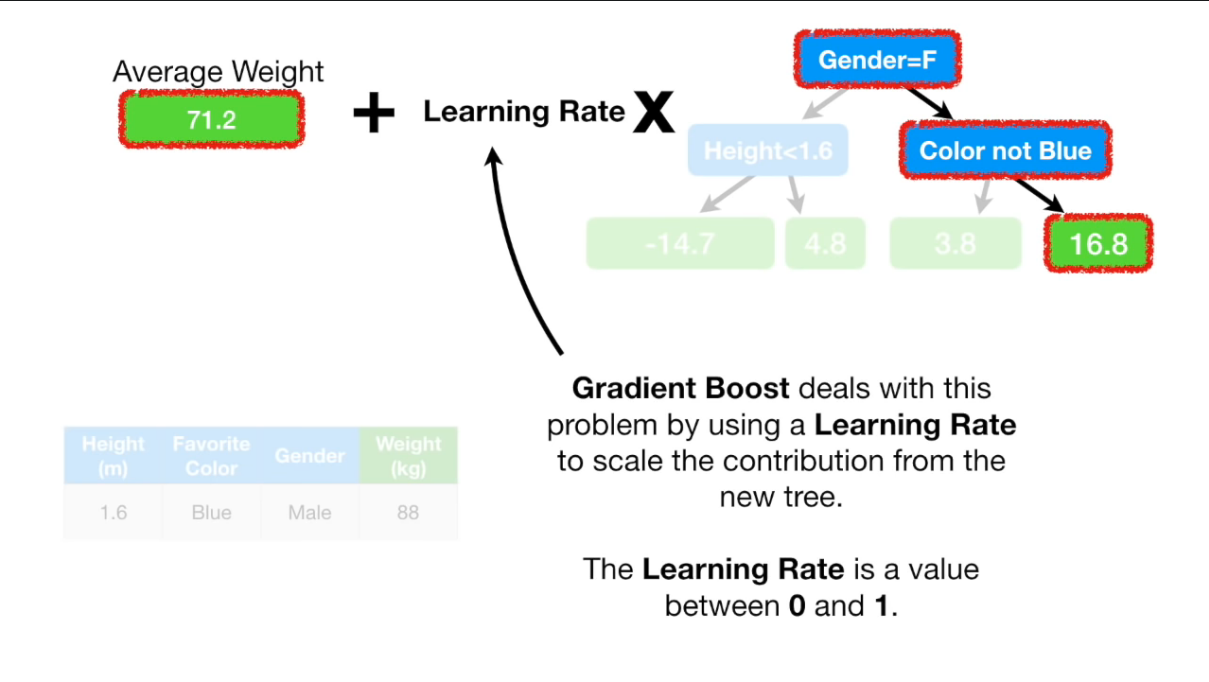<br>
For our example we will set the learning rate for our model to be `0.1`, which will increase the bias of the model but will improve the variance.
> 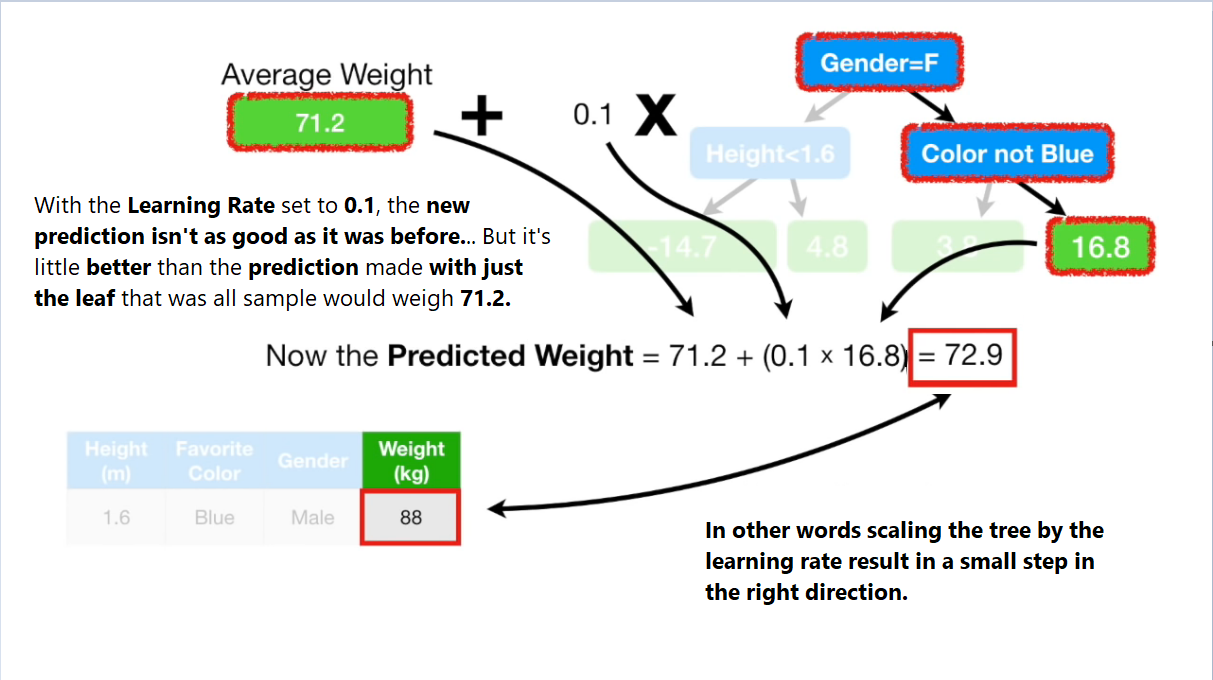

* **`Step 5:`** Now we will again calculate the pseudo residual for our latest prediction and it will become target variable for our next tree.
> 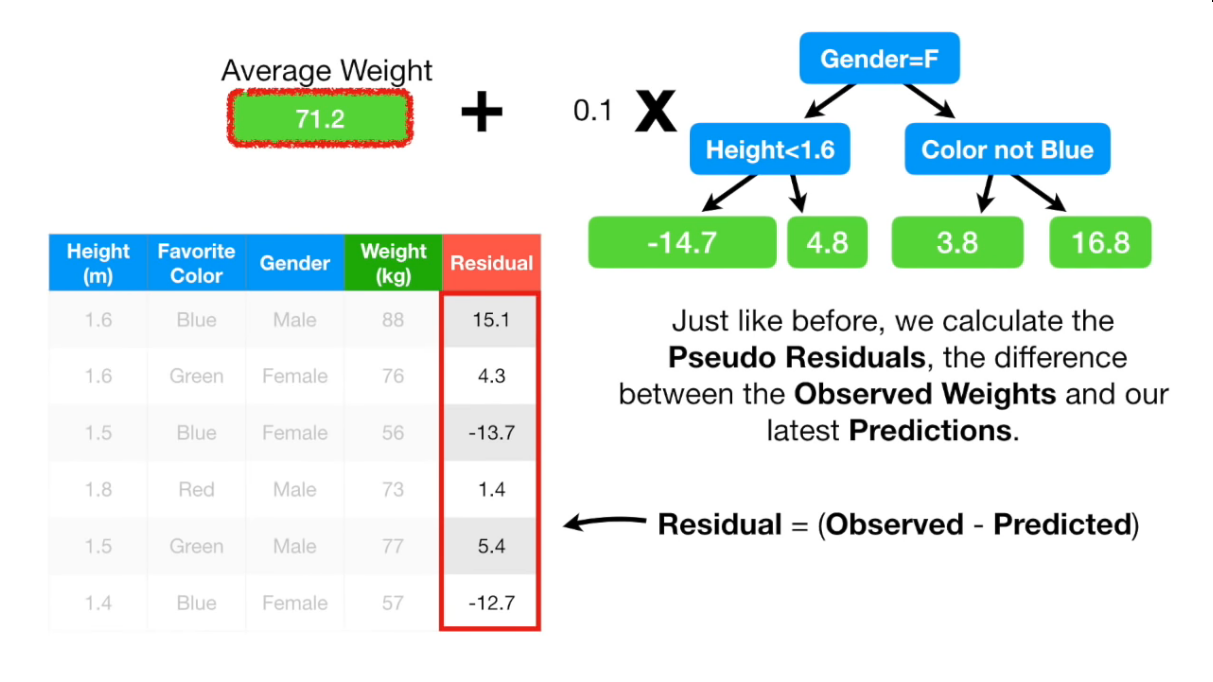
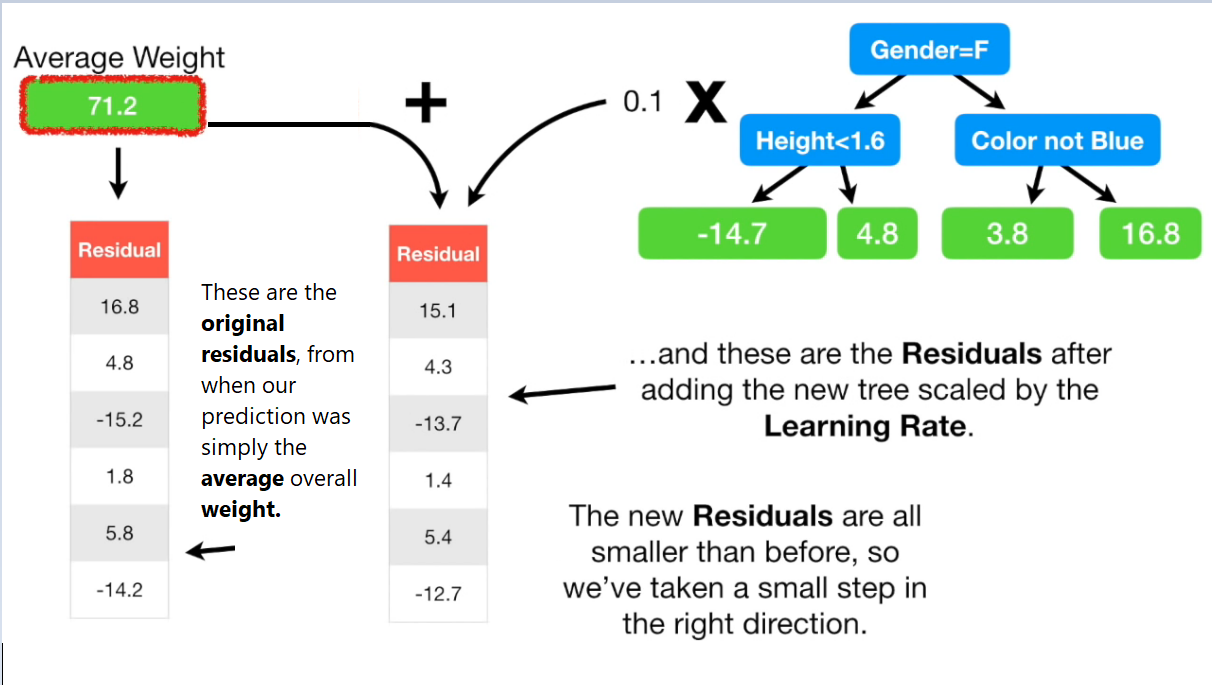

* **`Step 6:`** After this we will repeat Step 3, 4, and 5. We will create new tree with the previous model residual as target variable and will scale it with same learning rate, add them with our previous `leaf`(1st model) and `tree`(2nd model) and again calculate the new residual and so on... until we reach the maximum specified number of trees or until adding any additional tree doesn't significantly reduce the size of the residuals.
> 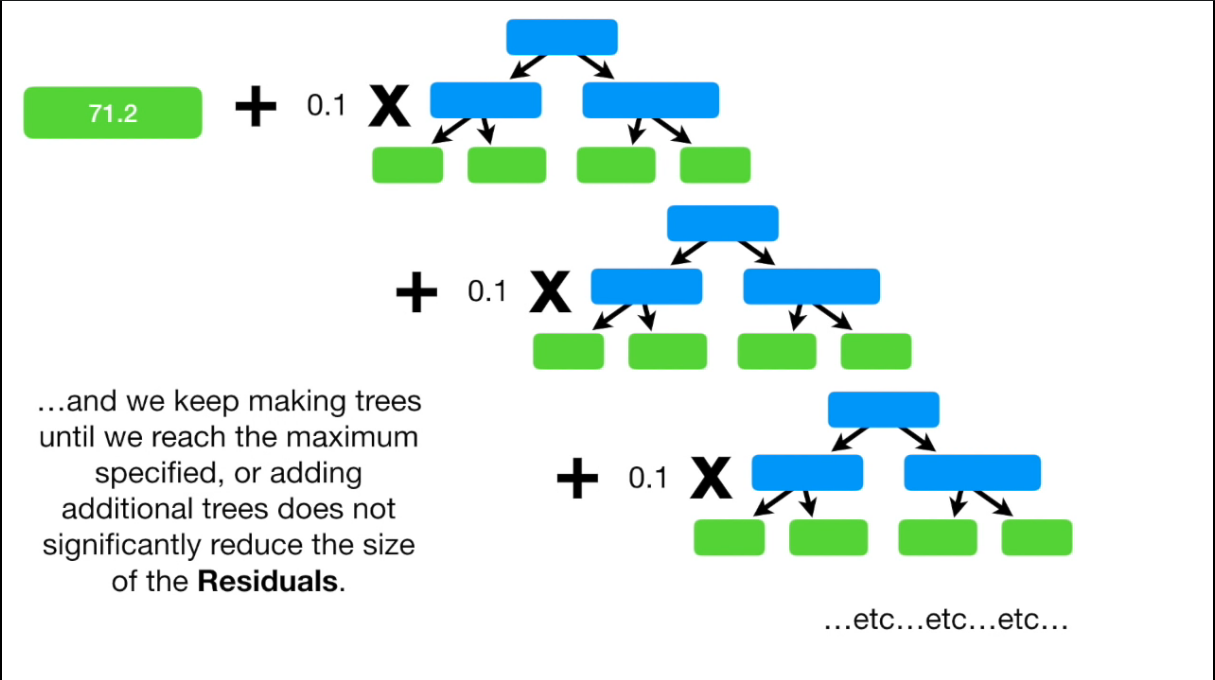
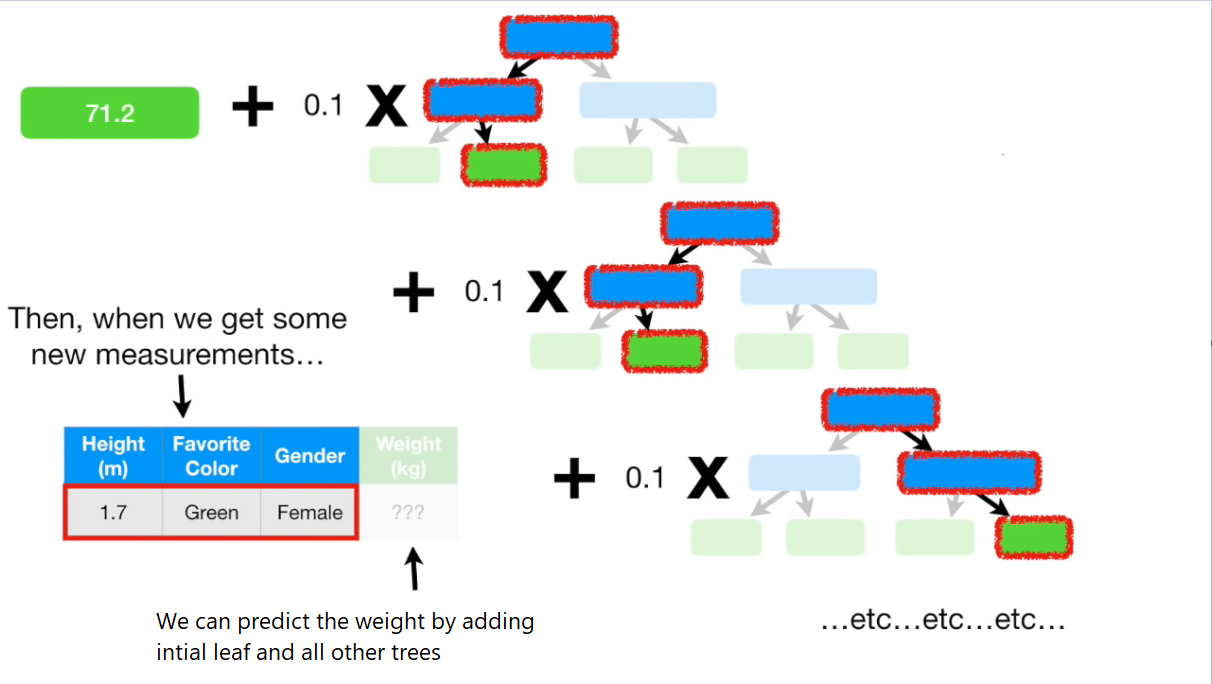

## Building Gradient Boosting (Regression)

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
# loading dataset
boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
label = boston.target

features.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [12]:
print(features.shape)
print(label.shape)

(506, 13)
(506,)


In [41]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=66)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [42]:
# building and training model
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)
model.fit(x_train, y_train)

# testing 
y_pred = model.predict(x_test)

In [43]:
# accuracy of the model
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(metrics.mean_absolute_error(y_test, y_pred))

0.9771696361027765
0.9449863205241994
1.728836957577318


### How Gradient Boosting (Classification) Works
Gradient Boosting works the same for classification as well, but it has some additional steps, because of categorical dataset. So lets see its process step by step, in this example we will be considering small binary dataset.
> 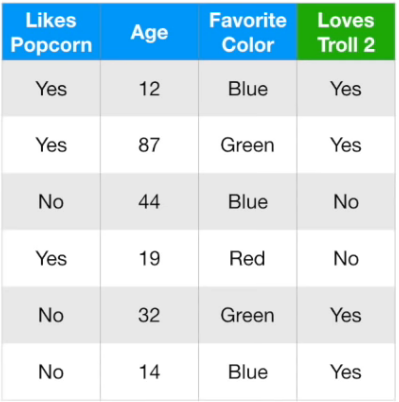

* **`Step 1:`** Just like gradient boosting regression, it start with a `leaf` which represents an initial prediction for every individual. But since here the target variable doesn't consist continuous values, this leaf is not able to takes average of the target column as a prediciton for each individuals. Instead here it take, `log(odds)` which is the log of (probabilit of yes/ probability of no) of the target variable and convert it into probability values using `Logistic function`. 
> In our example dataset it would look like this: First we calculate the logs of the odds <br>
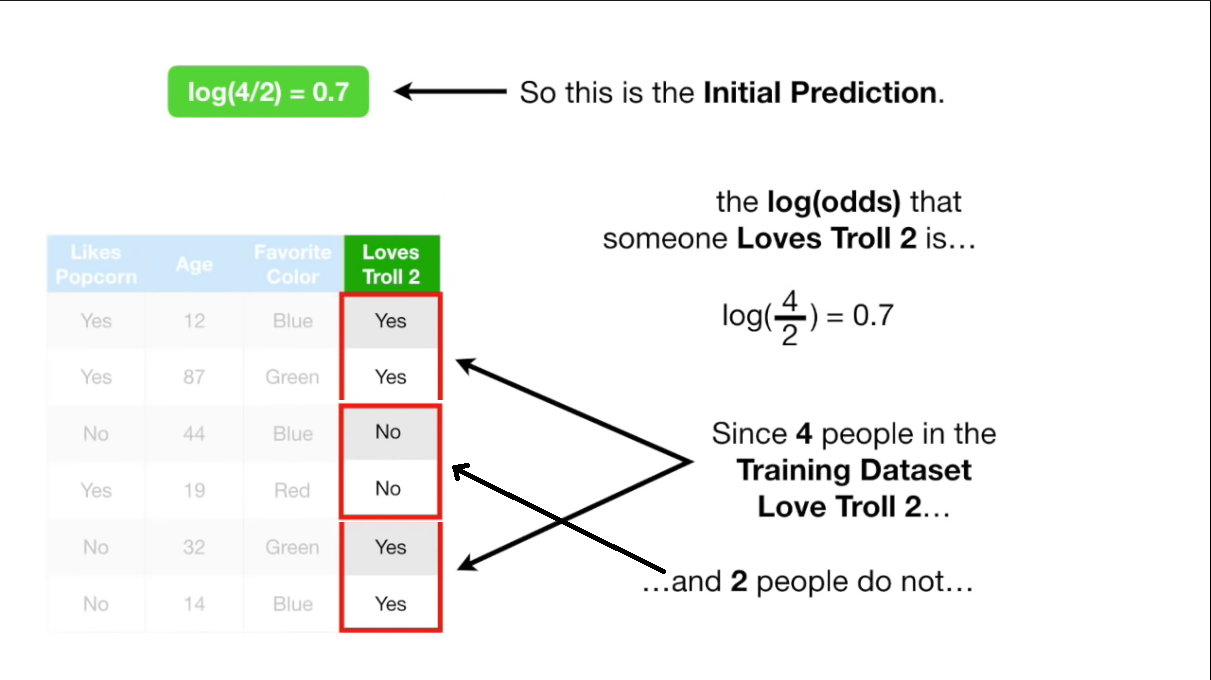 <br>
Then we will convert this into probabiltiy values <br>
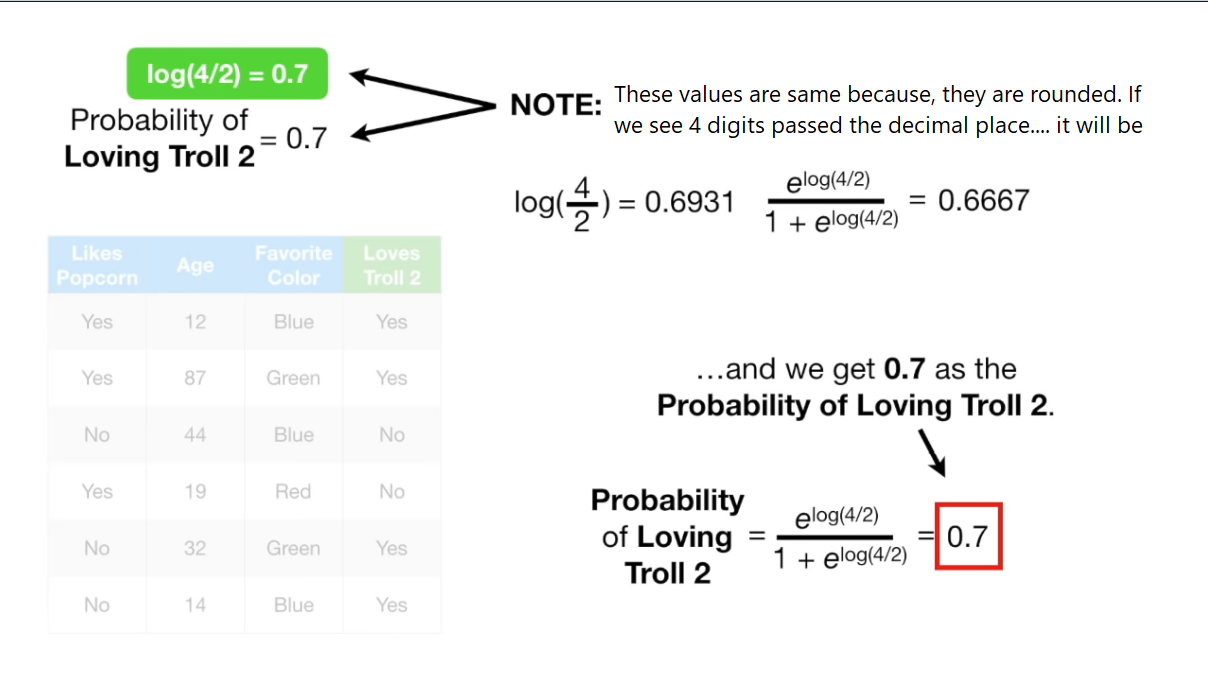<br>
We generally use `0.5` as the threshold value for logistic regression we can also set other values as threshold too. Here our probability value for target variable is 0.7 so for each records it can classify it as someone who `loves Troll 2`.

* **`Step 2:`** Next it will calculate the error made by the `leaf` for each individual records, just like regression here these errors are also called `Pseudo residuals`. Formula for calculating these residuals is simple `Actual - predicted` since here we have categorical values so the values for these categories will be `Yes = 1` & `No = 0` and `predicted` represent the value of our probability. 
> 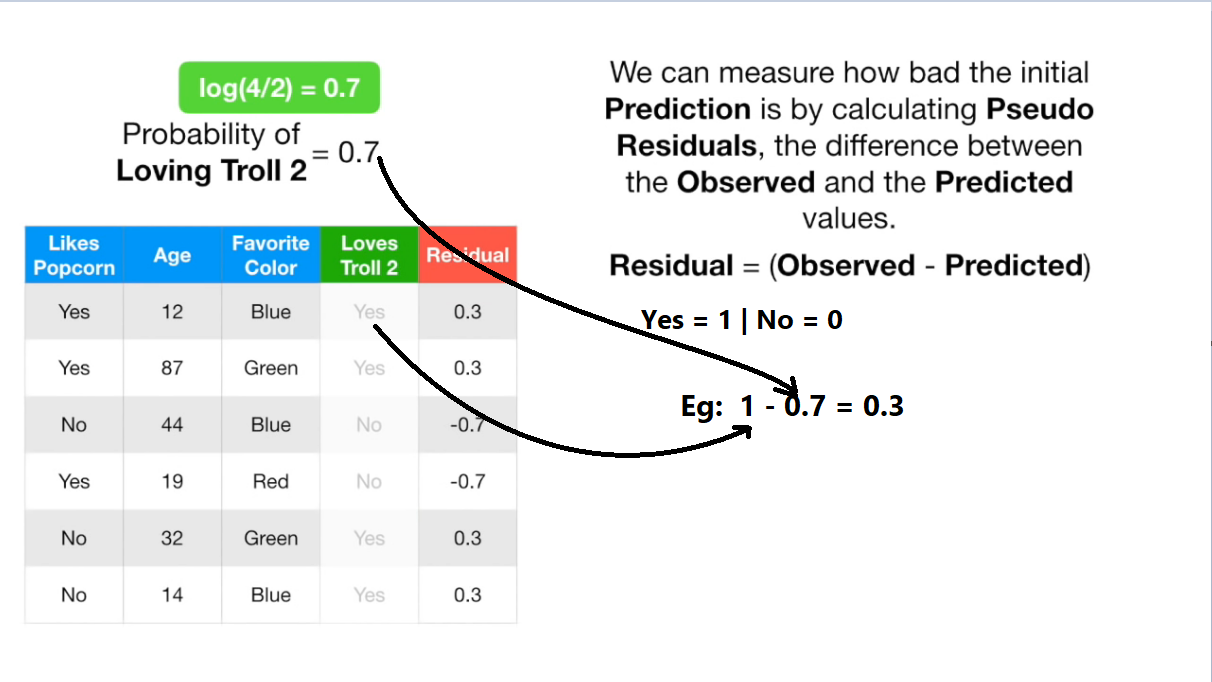

* **`Step 3:`** Next step is to build decision tree where we try to predict our `pseudo residuals` based on all available features in dataset, as we did for gradient boosting regression. But unlike its regression variant, we have to peform one additional step here which is to transform the values of each leaf node of our decision tree. It is because we did the prediction(from our 1st leaf model) in terms of `log(odds)`  and the leaf of new generated decision tree, which are residuals is derived from the probability, so we can't add them together and we need to tranform them.
> This is our generated decision tree <br>
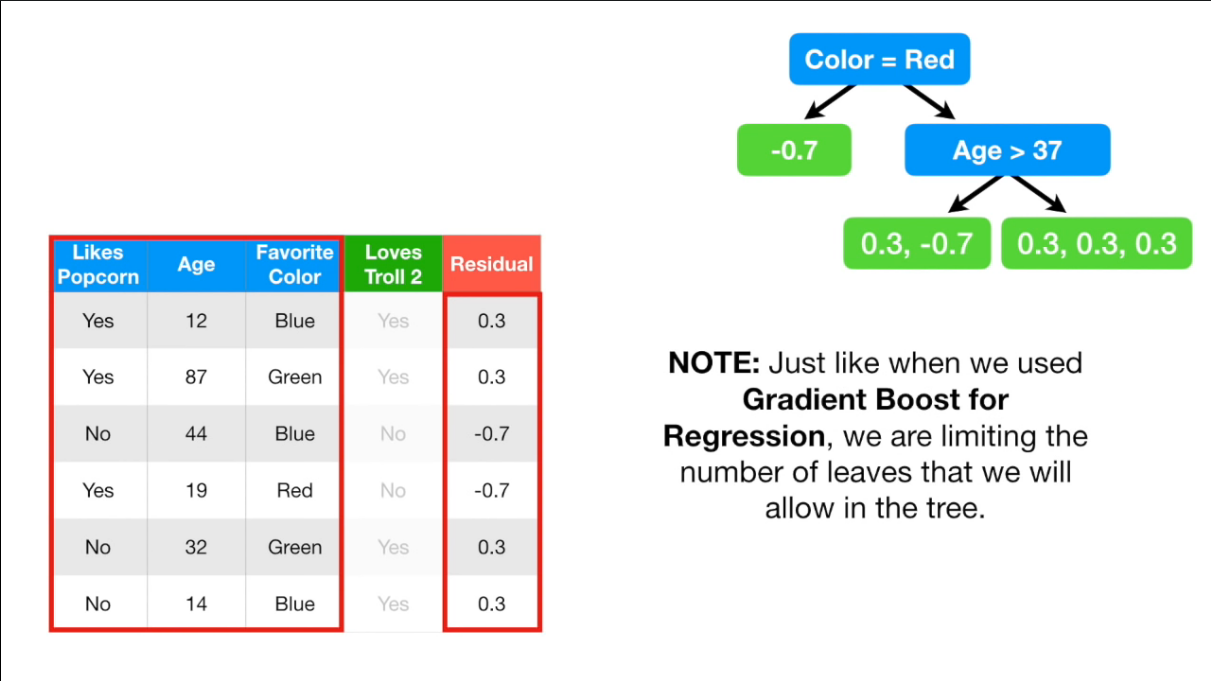<br>
Now to transform our leaf node, we need to use the following formula<br>
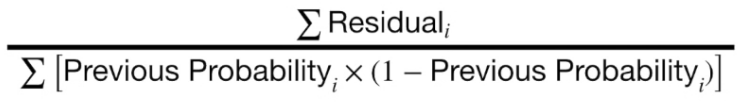 <br>
We need to apply the formula on each leaf node one by one. So lets see it how?<br>
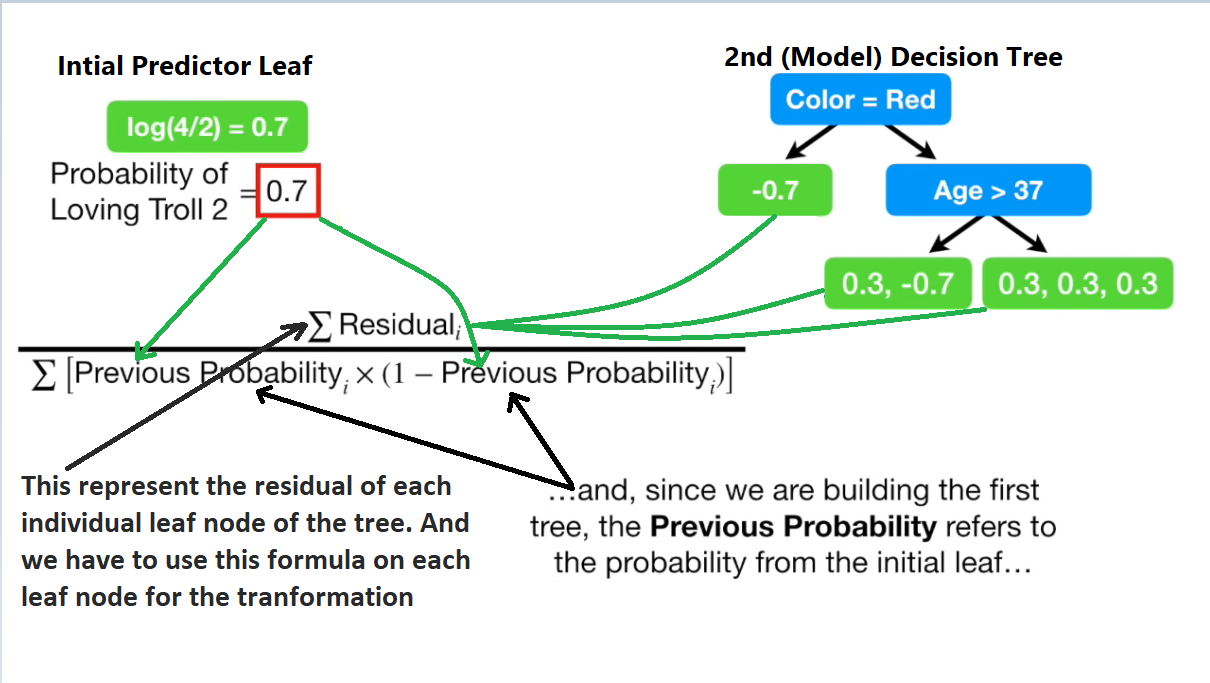
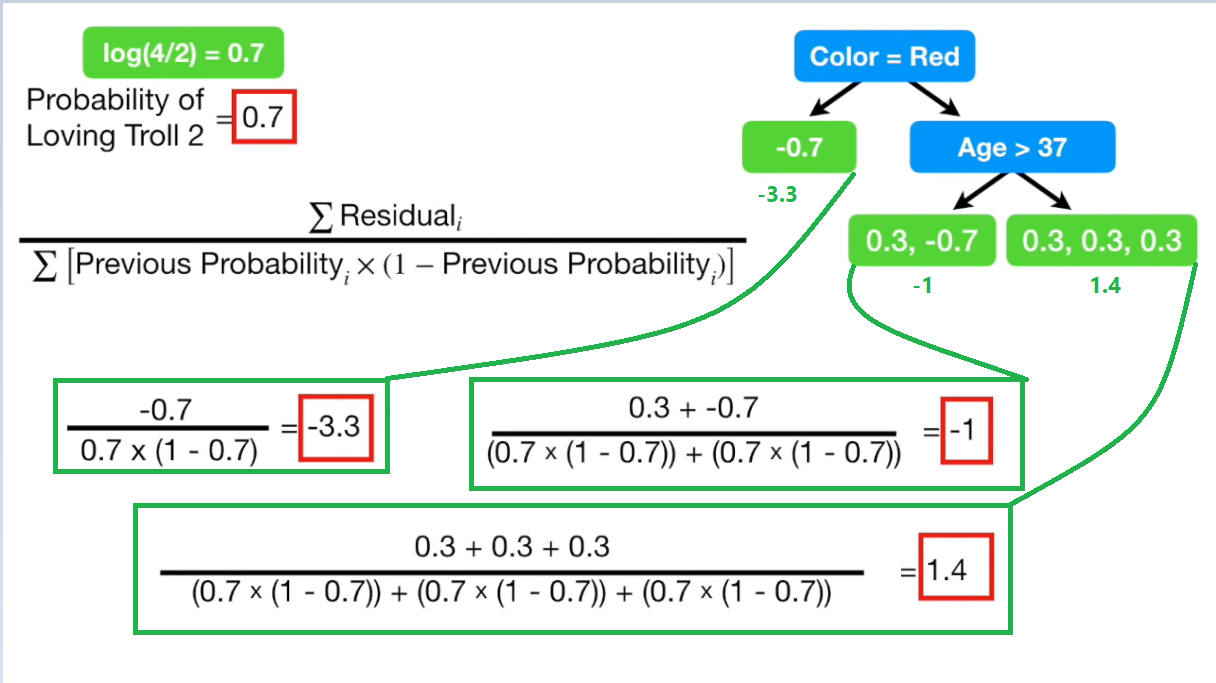

* **`Step 4:`** As our first tree is ready, we will make prediction for each records by combining the prediction of our `initial leaf node` along with our `newly created tree`. But before that we will need to scale our tree with best `learning rate` as we did in gradient boosting for regression above for reducing the variance of the model.
> In this example we will be scaling our tree with learning rate 0.8. We are using such large learning rate for just illustrative purpose, commonly it is 0.1.
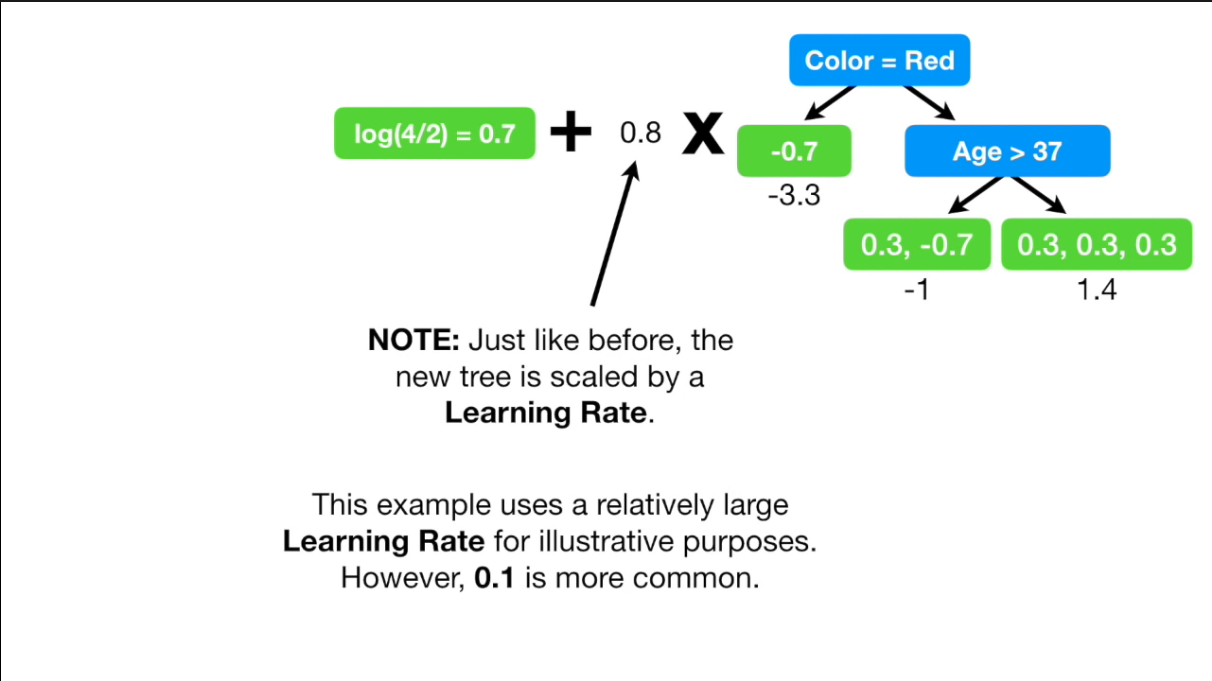

* **`Step 5:`** Now in this step we want to calculate `pseudo residual` for our new model(combination of initial leaf and tree). For this we will predict each records of training data, calculate their log(odds), convert them into probability value using logistic function, and finally will calculate the residuals.
> We will calculate the probability value of each records like this <br>
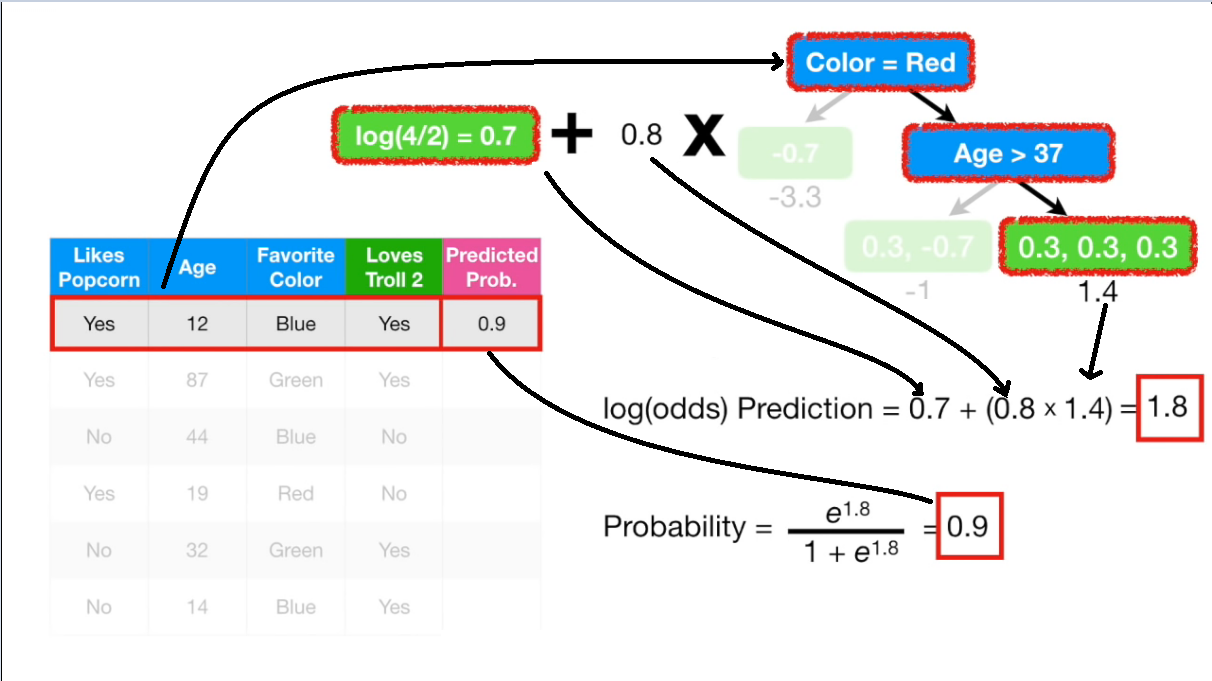 <br>
Following the above process we can calculate other's prob values <br>
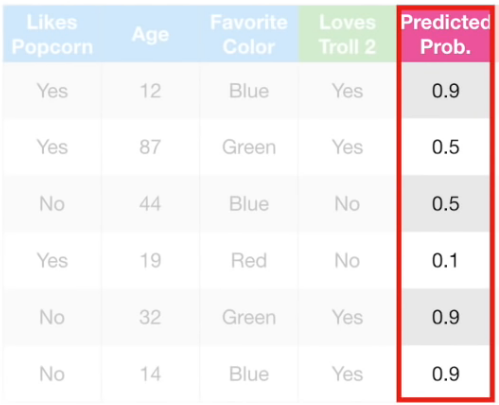 <br>
And finally we can calculate the `pseudo residual` like we did in above regression case <br>
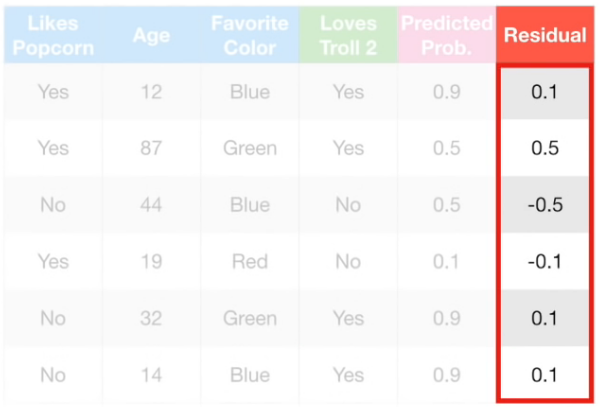

* **`Step 6:`** After this we will repeat Step 3, 4, and 5. We will create new tree with the previous model residual as target variable and will scale it with same learning rate, add them with our previous `leaf`(1st model) and `tree`(2nd model) and again calculate the new residual and so on... until we reach the maximum specified number of trees or until adding any additional tree doesn't significantly reduce the size of the residuals.
> 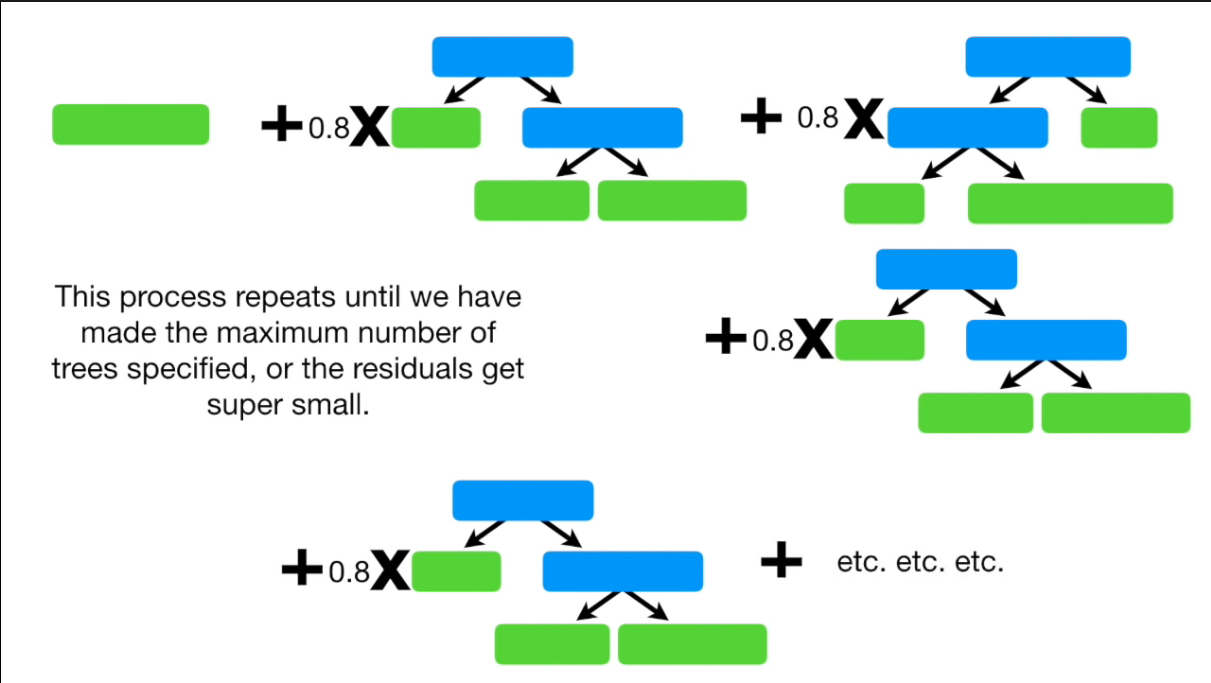

## Building Gradient Boosting (Classification)

In [48]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
# loading dataset
wine = load_wine()
features = pd.DataFrame(wine.data, columns=wine.feature_names)
label = wine.target

features.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [50]:
print(features.shape)
print(label.shape)

(178, 13)
(178,)


In [54]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=60)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [55]:
# building and training model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
model.fit(x_train, y_train)

# testing 
y_pred = model.predict(x_test)

In [56]:
# accuracy of the model
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(metrics.mean_absolute_error(y_test, y_pred))

1.0
0.9722222222222222
0.027777777777777776
